## Import necessary modules


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os, sys
os.chdir('drive/My Drive/Neural/SSM/Neural Analysis')

Mounted at /content/drive


In [2]:
# if not os.path.isdir('./ssm'):
#  !git clone https://github.com/lindermanlab/ssm.git
  # !cd ssm
  # !pip install numpy cython
  # !pip install -e ssm/.

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

import os
import yaml
# Select device to train LFADS on
device = 'cuda' if torch.cuda.is_available() else 'cpu'; print('Using device: %s'%device)

Using device: cpu


## Load or Generate Data 

In [4]:
from scipy import io as sio
mat = sio.loadmat('./chewie_CO_CS_BL_10212016_001_py_25ms')

In [5]:
num_cells = {'pmd':mat['neural_data_PMd'][0,0].shape[0], 
             'm1': mat['neural_data_M1'][0,0].shape[0],
             'all': mat['neural_data_PMd'][0,0].shape[0] +  mat['neural_data_M1'][0,0].shape[0]}

num_trials = mat['neural_data_PMd'].shape[1]

## find when cue is on to align all trials
kin_dt = 0.01
cue_on_bin= [int(mat['go_time_rel'][0,i][0,0]/kin_dt/2.5) for i in range(mat['go_time_rel'].shape[1])]
move_bin= [int(mat['move_time_rel'][0,i][0,0]/kin_dt/2.5) for i in range(mat['move_time_rel'].shape[1])]
ys = {'pmd':[], 'm1':[], 'all':[]}
for trial in range(num_trials):
  ys['all'].append(np.concatenate([mat['neural_data_PMd'][0,trial].T,mat['neural_data_M1'][0,trial].T], axis = 1).astype(int))
  ys['pmd'].append((mat['neural_data_PMd'][0,trial].T).astype(int))
  ys['m1'].append((mat['neural_data_M1'][0,trial].T).astype(int))


(array([12., 31., 41., 33., 33., 39., 38., 32., 22.,  5.]),
 array([ 63. ,  67.9,  72.8,  77.7,  82.6,  87.5,  92.4,  97.3, 102.2,
        107.1, 112. ]),
 <a list of 10 Patch objects>)

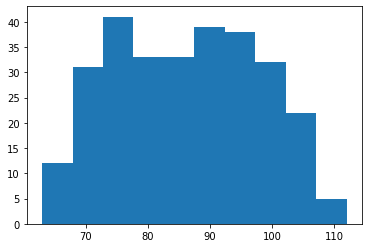

In [6]:
# TODO: What should I do here? 
plt.hist([y.shape[0] for y in ys['all']])

In [ ]:
# num_steps = max([y.shape[0] for y in ys['all']])
# ys_padded = {'all' :np.array([np.pad(ys['all'][i],((0,num_steps - ys['all'][i].shape[0]),(0,0),), constant_values = 0) for i in range(num_trials)]),
#              'm1': np.array([np.pad(ys['m1'][i],((0,num_steps - ys['m1'][i].shape[0]),(0,0),), constant_values = 0) for i in range(num_trials)]),
#              'pmd': np.array([np.pad(ys['pmd'][i],((0,num_steps - ys['pmd'][i].shape[0]),(0,0),), constant_values = 0) for i in range(num_trials)])}

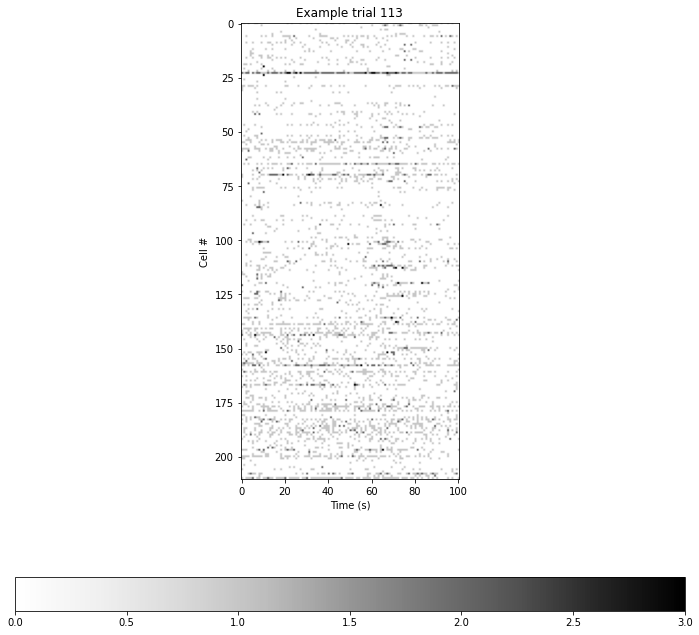

In [7]:
plt.figure(figsize = (12,12))
random_trial = np.random.randint(num_trials)
plt.imshow(ys['pmd'][random_trial].T, cmap=plt.cm.Greys)
plt.xlabel('Time (s)')
plt.ylabel('Cell #')
plt.colorbar(orientation='horizontal')
plt.title(f'Example trial {random_trial}');

## SLDS

In [8]:
sys.path.append('/content/drive/My Drive/Neural/SSM/Neural Analysis/ssm')

In [9]:
#sys.path.append('ssm')

import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import ssm
import seaborn as sns
from ssm.util import one_hot, find_permutation

npr.seed(0)
sns.set(palette="colorblind")

from matplotlib import pyplot as plt
%matplotlib inline
import autograd.numpy as np
import autograd.numpy.random as npr

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")
sns.set_style('ticks',{"xtick.major.size":8,
"ytick.major.size":8})
from ssm.plots import gradient_cmap, white_to_color_cmap

color_names = [
    "purple",
    "red",
    "amber",
    "faded green",
    "windows blue",
    "orange"
    ]

colors = sns.xkcd_palette(color_names)
cmap = gradient_cmap(colors)

import datetime

#### Test SLDS Gaussian

Initializing with an ARHMM using 25 steps of EM.


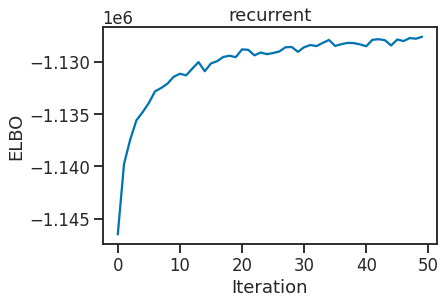

Initializing with an ARHMM using 25 steps of EM.


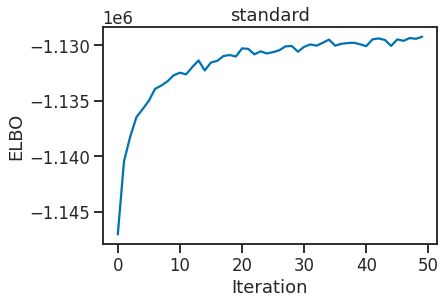

Initializing with an ARHMM using 25 steps of EM.


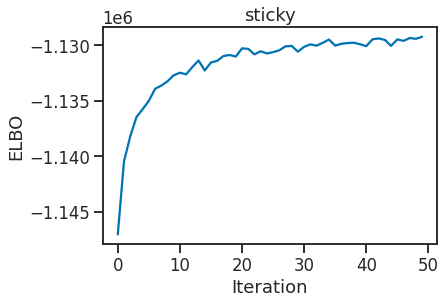

Initializing with an ARHMM using 25 steps of EM.


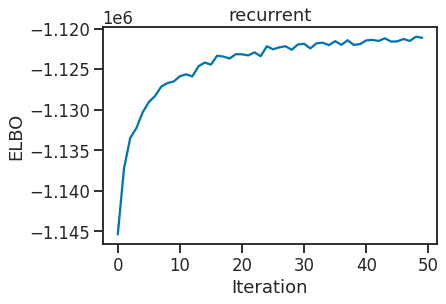

Initializing with an ARHMM using 25 steps of EM.


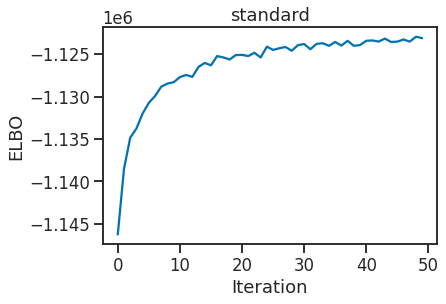

Initializing with an ARHMM using 25 steps of EM.


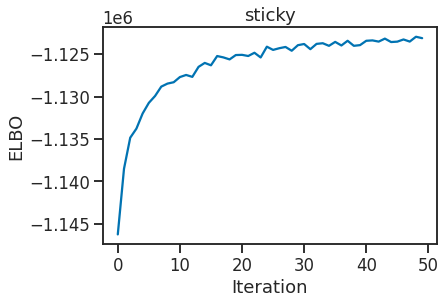

Initializing with an ARHMM using 25 steps of EM.


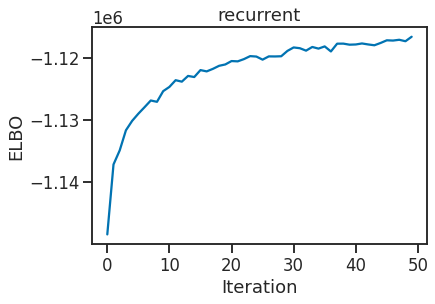

Initializing with an ARHMM using 25 steps of EM.


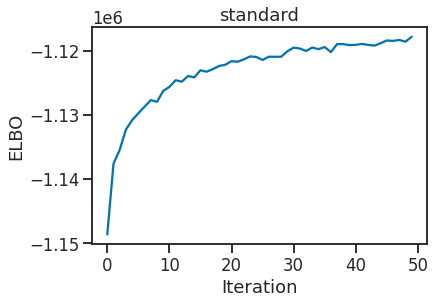

Initializing with an ARHMM using 25 steps of EM.


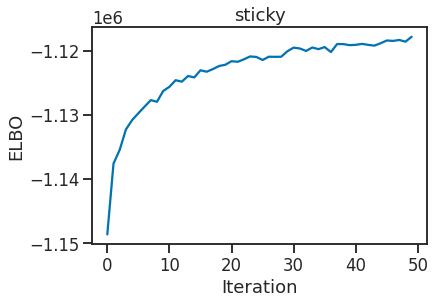

Initializing with an ARHMM using 25 steps of EM.


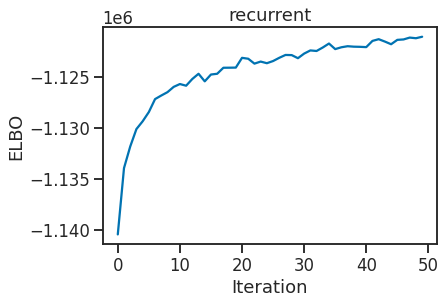

Initializing with an ARHMM using 25 steps of EM.


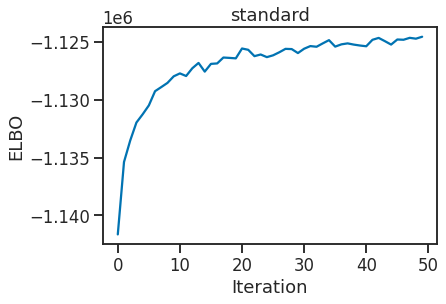

Initializing with an ARHMM using 25 steps of EM.


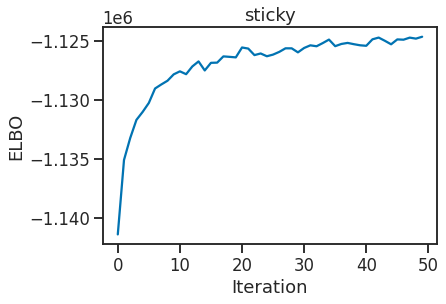

Initializing with an ARHMM using 25 steps of EM.


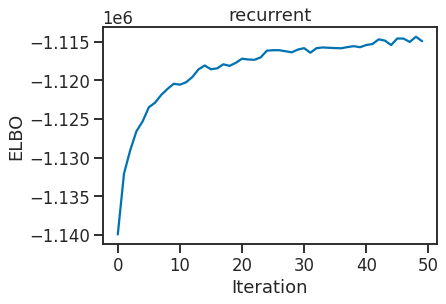

Initializing with an ARHMM using 25 steps of EM.


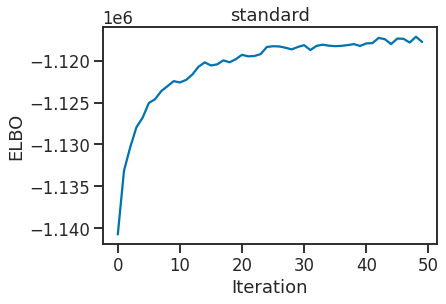

Initializing with an ARHMM using 25 steps of EM.


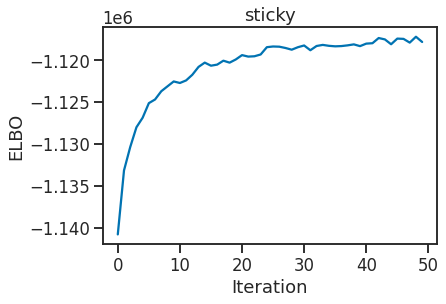

Initializing with an ARHMM using 25 steps of EM.


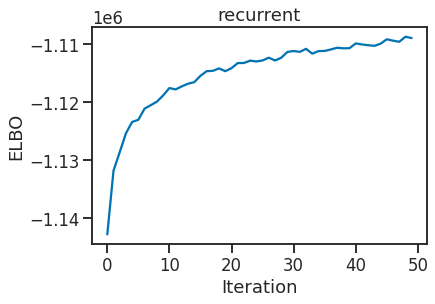

Initializing with an ARHMM using 25 steps of EM.


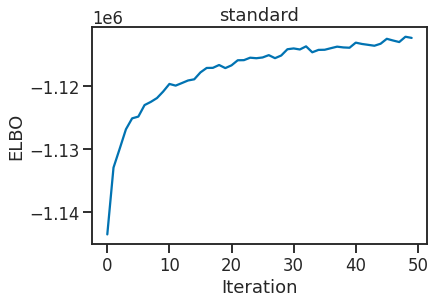

Initializing with an ARHMM using 25 steps of EM.


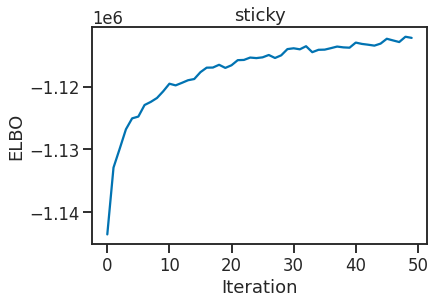

Initializing with an ARHMM using 25 steps of EM.


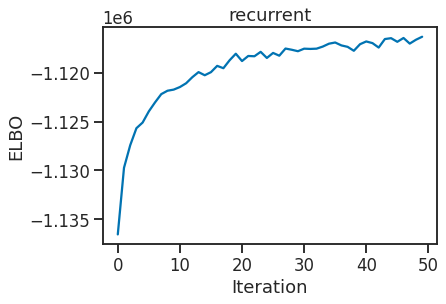

Initializing with an ARHMM using 25 steps of EM.


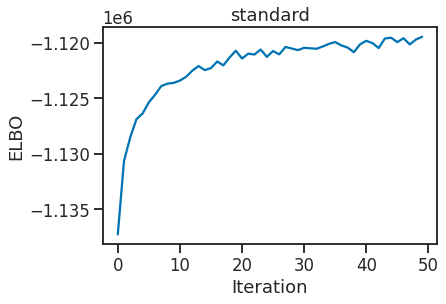

Initializing with an ARHMM using 25 steps of EM.


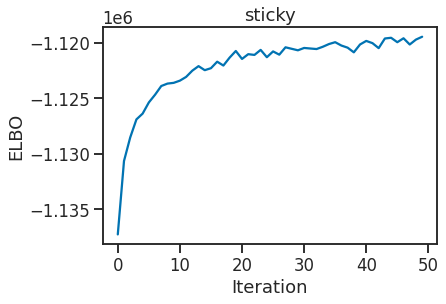

Initializing with an ARHMM using 25 steps of EM.


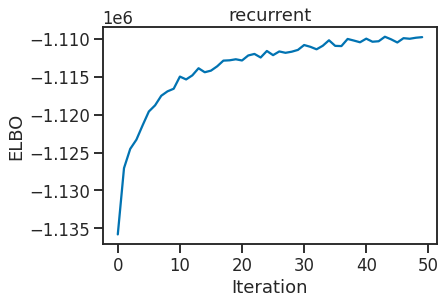

Initializing with an ARHMM using 25 steps of EM.


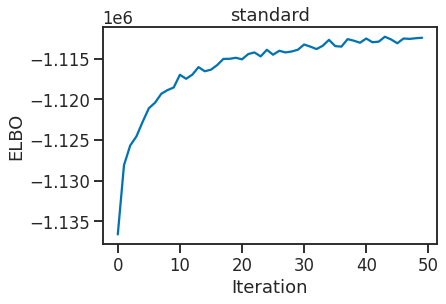

Initializing with an ARHMM using 25 steps of EM.


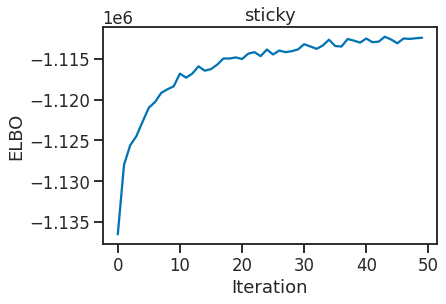

Initializing with an ARHMM using 25 steps of EM.


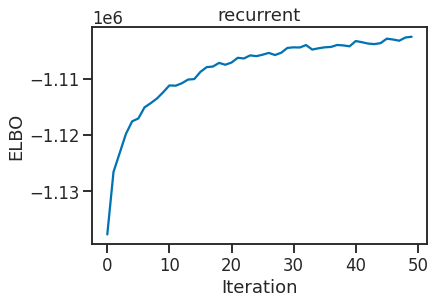

Initializing with an ARHMM using 25 steps of EM.


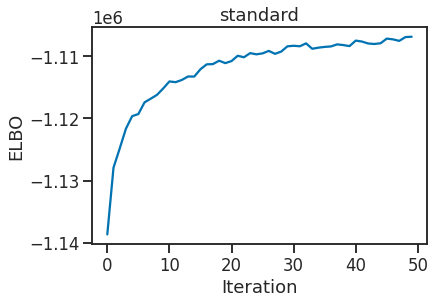

Initializing with an ARHMM using 25 steps of EM.


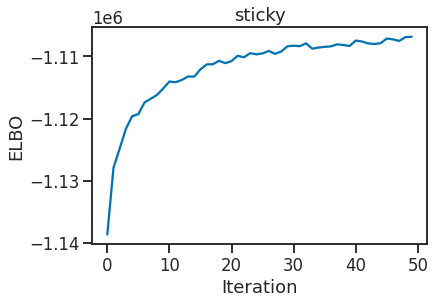

Initializing with an ARHMM using 25 steps of EM.


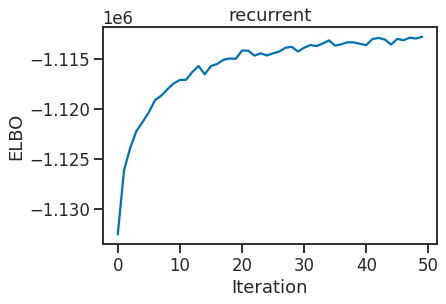

Initializing with an ARHMM using 25 steps of EM.


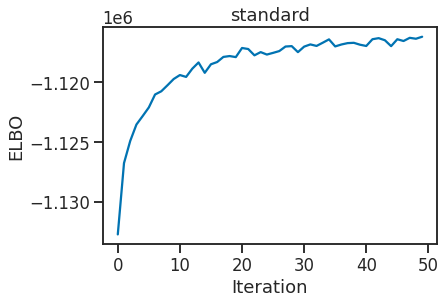

Initializing with an ARHMM using 25 steps of EM.


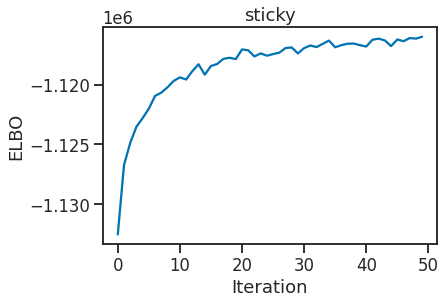

Initializing with an ARHMM using 25 steps of EM.


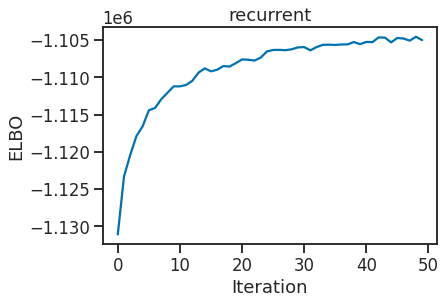

Initializing with an ARHMM using 25 steps of EM.


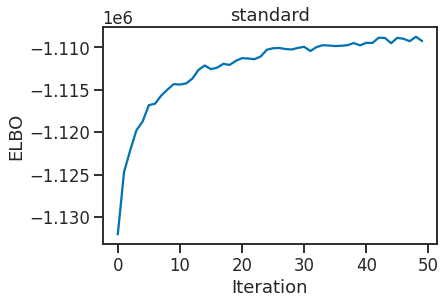

Initializing with an ARHMM using 25 steps of EM.


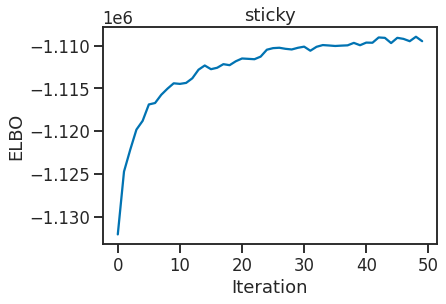

Initializing with an ARHMM using 25 steps of EM.


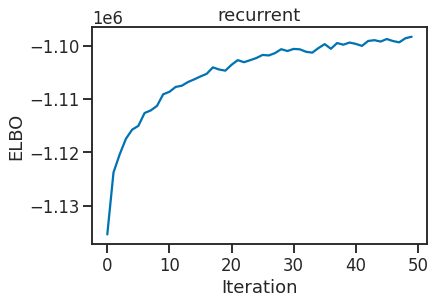

Initializing with an ARHMM using 25 steps of EM.


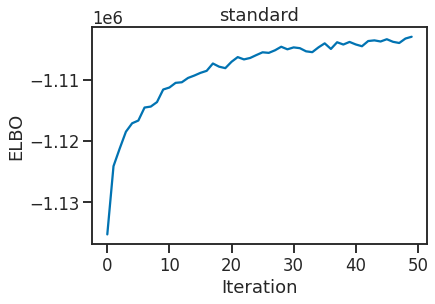

Initializing with an ARHMM using 25 steps of EM.


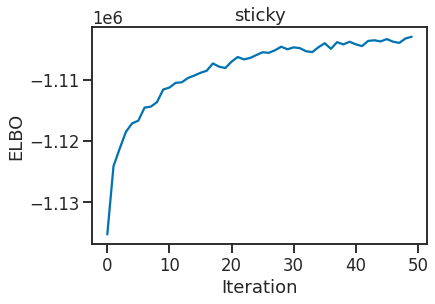

In [19]:
DATASET = 'm1'
for K in [3,4,5,6]:
  for D_latent in [5,7,10]:
    for transitions in ['recurrent', 'standard', 'sticky']:
      ### SLDS on spike 
      random_seed = 0
      np.random.seed(random_seed)

      D_obs = num_cells[DATASET] 
      dynamics="diagonal_gaussian"
      emissions="poisson"
      method="laplace_em"
      variational_posterior="structured_meanfield"
      
      initialize=5
      num_iters=50

      rslds_full = ssm.SLDS(D_obs, K, D_latent,
                      transitions=transitions,
                      dynamics=dynamics,
                      emissions=emissions,
                      single_subspace=True)

      q_elbos_lem, q_lem = rslds_full.fit(ys[DATASET][:num_trials], method=method,
                                      variational_posterior=variational_posterior,
                                      initialize=initialize, num_iters=num_iters, alpha=0.0)

      plt.plot(q_elbos_lem[1:])
      plt.xlabel("Iteration")
      plt.ylabel("ELBO")
      plt.title(transitions)
      plt.show()

      zhat_lem = [rslds_full.most_likely_states(q_lem.mean_continuous_states[i], ys[DATASET][i]) for i in range(num_trials)]

      results = {'num_trials': num_trials, 'K': K, 'D_obs': D_obs, 'D_latent': D_latent, 
                                  'transitions': transitions,
                                  'dynamics': dynamics, 
                                  'emissions': emissions, 
                                  'method': method, 
                                  'variational_posterior': variational_posterior,
                                  'initialize': initialize, 'num_iters':num_iters,
                                  'zhat': zhat_lem, 'q_lem': q_lem, 'q_elbos_lem': q_elbos_lem, 
                                  'params':rslds_full.params,
                                  'random_seed': random_seed}

      np.save(f'./models/slds/{DATASET}/SLDS_' + DATASET+ '_' + 'K=' + str(K) + '_D=' + str(D_latent) + '_Transitions=' + transitions + '.npy',np.array(results))

In [17]:
np.save('./models/slds/pmd/SLDS_test.npy',np.array([0,1,2]))

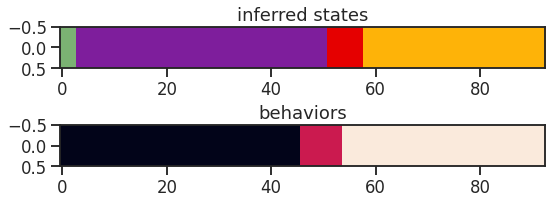

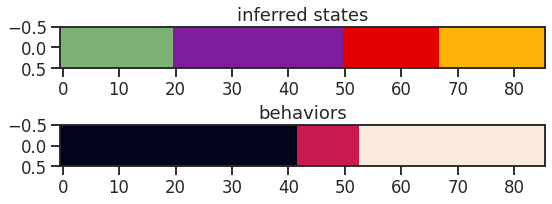

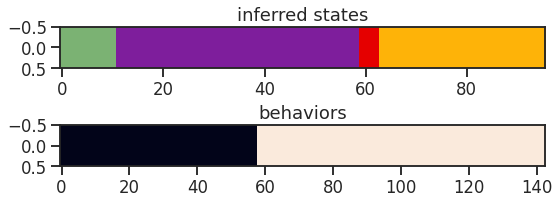

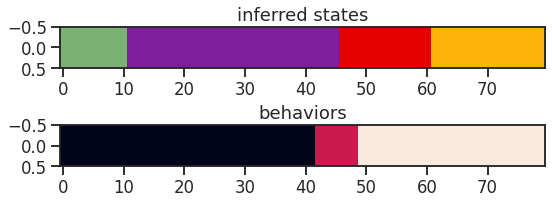

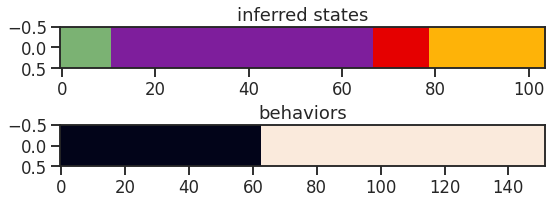

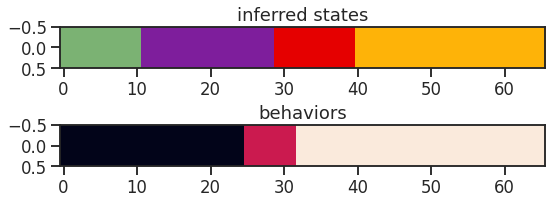

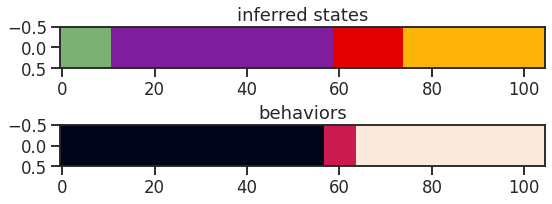

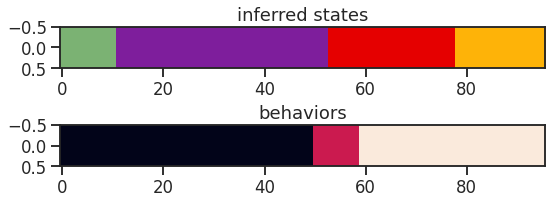

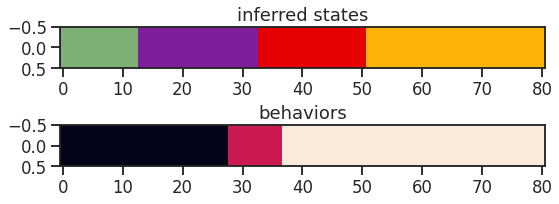

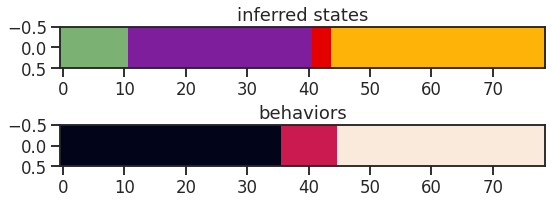

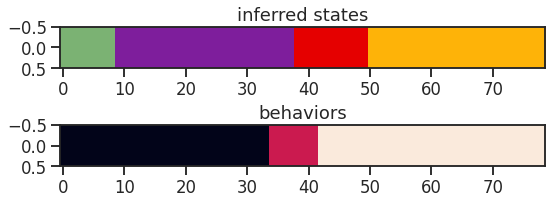

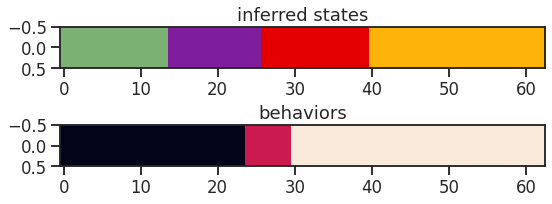

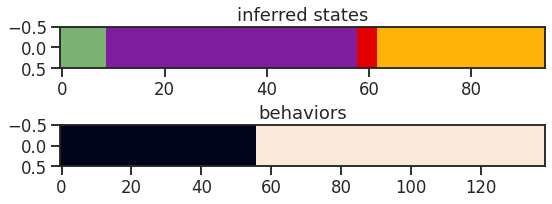

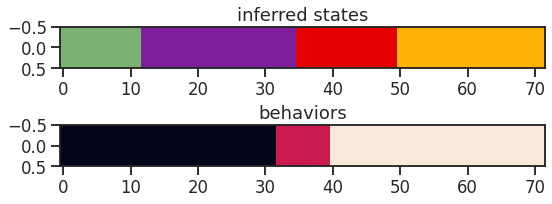

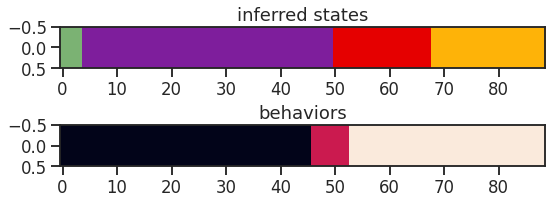

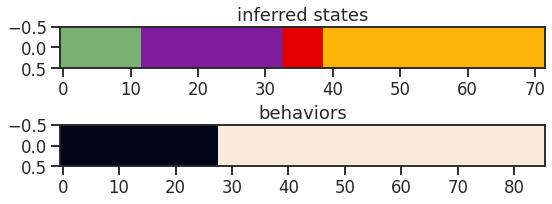

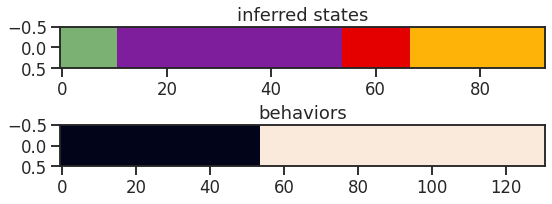

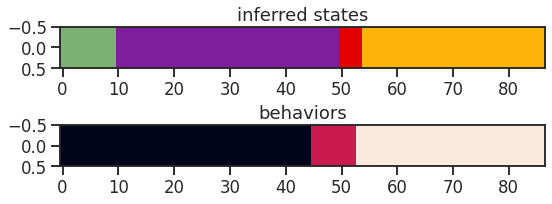

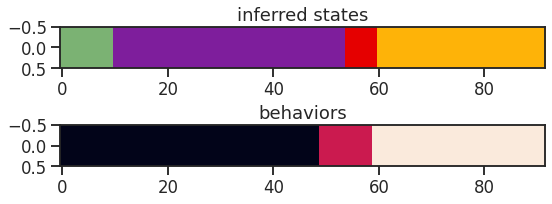

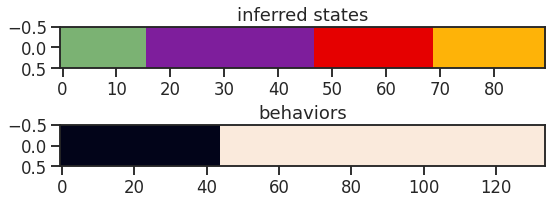

In [ ]:
for i in range(20):
  f, axarr = plt.subplots(2,1, figsize = (8,3))
  f.tight_layout()
  #f.set_figheight = 1
  #f.set_figwidth = 16
  #plt.figure(figsize = (8,1))
  axarr[0].imshow(zhat_lem[i][None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)
  axarr[0].set_title('inferred states')
  axarr[1].imshow([[1]*cue_on_bin[i] + [2] * (move_bin[i]-cue_on_bin[i]) + [3]*(len(zhat_lem[i]) - move_bin[i])] , aspect="auto")#, cmap=cmap, vmin=0, vmax=len(colors)-1)
  axarr[1].set_title('behaviors')
  #plt.title(transitions + str(i))
  plt.show()

In [ ]:
temp= axarr[0]
temp.set_title('test')

Text(0.5, 1.0, 'test')

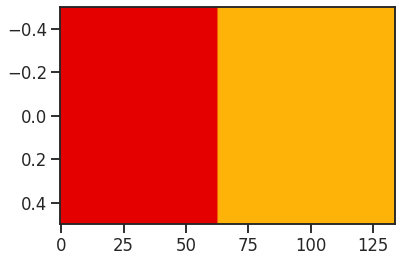

In [ ]:
zhat_lem[i][None,:]

array([[2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [ ]:
[cue_on_bin[i],move_bin[i]]

[63, 71]

In [ ]:
# temp = q_lem.continuous_expectations

In [ ]:
# slds_xs = q_lem.mean
# rates = [rslds_full.smooth(x, y) for x, y in zip(slds_xs, ys[DATASET])]

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


AttributeError: ignored

In [ ]:
# # how to read output??
# output = [x for x in os.listdir() if 'SLDS_Full_pmd' in x]
# time = [int(x.strip('.npy').split('_')[-1]) for x in output]
# latest_file = output[ time.index(max(time))]
# read = np.load(latest_file, allow_pickle = True).tolist()

# for i in range(3):
#   plt.figure(figsize = (8,1))
#   plt.title(transitions + str(i))
#   plt.imshow(read['zhat'][i][None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)
#   plt.show()


ValueError: ignored

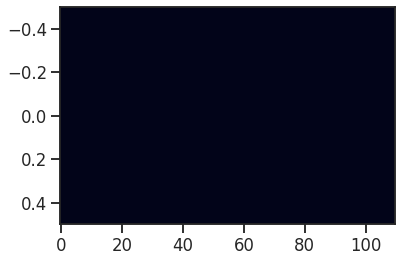

In [ ]:
# plt.imshow(zhat_lem[8][None,:], aspect="auto")#, cmap=cmap, vmin=0, vmax=len(colors)-1)


### Test SLDS on denoised rates

Initializing with an ARHMM using 25 steps of EM.


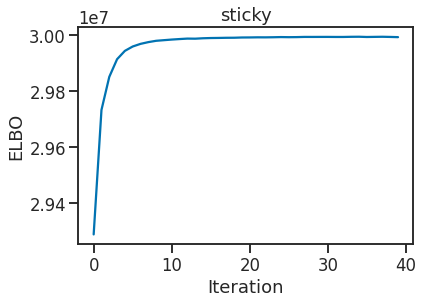

In [ ]:
### Single population
for K in [5]:
  for D_latent in [5]:
    for transitions in ['sticky']:
      random_seed = 0 
      np.random.seed(random_seed)

      #K = 3
      D_obs = num_cells[DATASET] 
      #D_latent = 5
      dynamics="gaussian"
      emissions="gaussian"
      method="laplace_em"
      variational_posterior="structured_meanfield"
      #transitions = 'sticky'

      initialize=5
      num_iters=40

      num_trials = 496
      rslds = ssm.SLDS(D_obs, K, D_latent,
                      transitions=transitions,
                      dynamics=dynamics,
                      emissions=emissions,
                      single_subspace=True)

      q_elbos_lem, q_lem = rslds.fit(xs[:num_trials], method=method,
                                      variational_posterior=variational_posterior,
                                      initialize=initialize, num_iters=num_iters, alpha=0.0)

      plt.plot(q_elbos_lem[1:])
      plt.xlabel("Iteration")
      plt.ylabel("ELBO")
      plt.title(transitions)
      plt.show()

      zhat_lem = [rslds.most_likely_states(q_lem.mean_continuous_states[i], xs[i]) for i in range(num_trials)]

      results = {'num_trials': num_trials, 'K': K, 'D_obs': D_obs, 'D_latent': D_latent, 
                                  'transitions': transitions,
                                  'dynamics': dynamics, 
                                  'emissions': emissions, 
                                  'method': method, 
                                  'variational_posterior': variational_posterior,
                                  'initialize': initialize, 'num_iters':num_iters,
                                  'zhat': zhat_lem, 'q_lem': q_lem, 'q_elbos_lem': q_elbos_lem, 
                                  'params':rslds.params,
                                  'random_seed': random_seed}

      np.save('SLDS_master_' + DATASET+ '_' + 'K=' + str(K) + '_D=' + str(D_latent) + '_Transitions=' + transitions + '_' + datetime.datetime.now().strftime('%y%m%d%H%M') +'.npy',np.array(results))

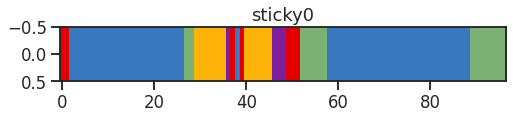

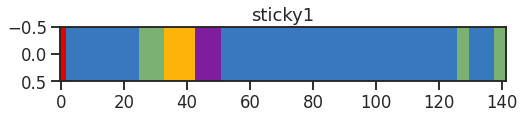

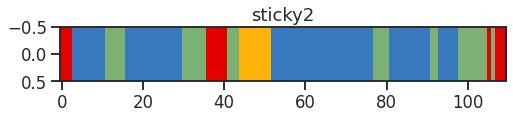

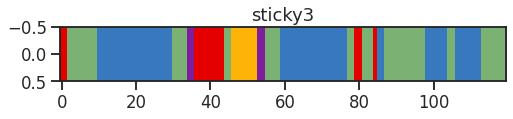

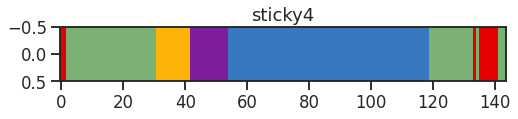

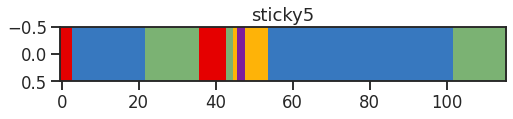

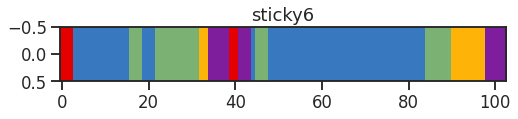

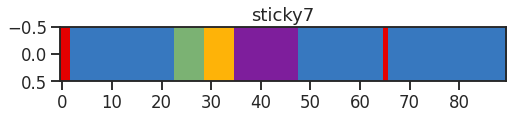

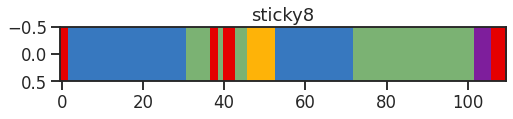

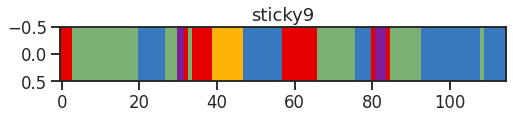

In [ ]:
for i in range(10):
  plt.figure(figsize = (8,1))
  plt.title(transitions + str(i))
  plt.imshow(zhat_lem[i][None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)
  plt.show()
  # #plt.xlim(0, T)
  # plt.subplots(2,1)
  # plt.subplot(2,1,1)
  # plt.ylabel("$z_{\\mathrm{inferred}}$")
  # plt.yticks([])
  # plt.xlabel("time")
  # plt.tight_layout()
  # plt.title(transitions + str(i))
  # plt.subplot(2,1,2)
  # plt.imshow(xs_truncated[i].T)
  

In [ ]:
rm ssm

NameError: ignored

In [ ]:

sys.path

In [ ]:

sys.path

In [ ]:

num_trials